NAME: ANMOL POONIA

ID: 202318009


PROGRAM : MSC DS


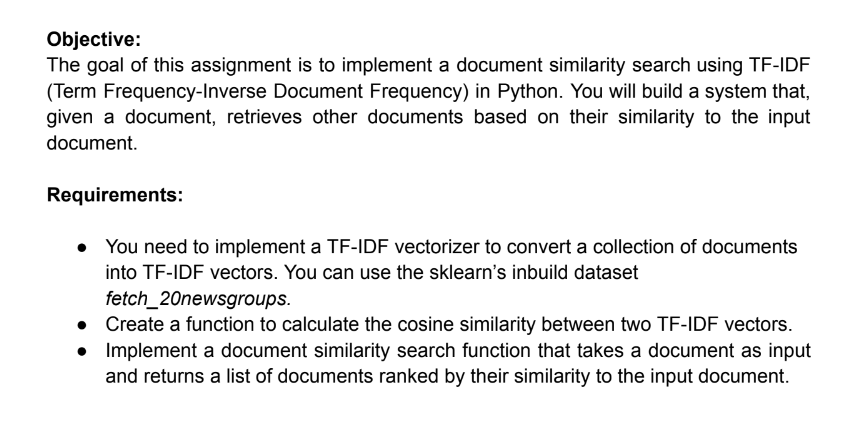

In [4]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import issparse

Function to compute TF-IDF matrix for a given set of documents.

In [5]:
def compute_tfidf_matrix(data):
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(data)
    return tfidf_matrix

Function to calculate cosine similarity between two vectors

In [6]:
def calculate_cosine_similarity(vec1, vec2):
    if issparse(vec1):
        vec1 = vec1.toarray()
    if issparse(vec2):
        vec2 = vec2.toarray()

    vec1 = vec1.reshape(len(vec1), -1)
    vec2 = vec2.reshape(len(vec2), -1)
    similarity = cosine_similarity(vec1, vec2)
    return similarity[0, 0]

Function to get random training indices for splitting the data

In [7]:
def get_random_training_indices(total_samples, exclude=[]):
    indices = np.arange(total_samples)
    if exclude:
        indices = np.setdiff1d(indices, exclude)
    return np.random.choice(indices, size=int(0.8 * total_samples), replace=False)

Function to find similar documents to a given document

In [8]:
def find_similar_documents(index, documents):
    base_document = documents[index]
    documents.pop(index)

    vectorizer = TfidfVectorizer(stop_words='english')
    training_matrix = vectorizer.fit_transform(documents)
    test_matrix = vectorizer.transform([base_document])

    similarity_scores = cosine_similarity(training_matrix, test_matrix)
    indices = np.arange(len(similarity_scores)).astype('int')

    sorted_indices = np.argsort(similarity_scores, axis=0).flatten()
    top_5_indices = sorted_indices.argsort()[:-6:-1]

    similar_documents = [documents[i][:30] for i in top_5_indices]

    return np.array(similar_documents)

Main code

In [9]:
data = fetch_20newsgroups(subset='train')

Step 1: Compute TF-IDF matrix for the entire dataset

In [10]:
tfidf_matrix = compute_tfidf_matrix(data['data'])
print('TD-IDF matrix:\n', tfidf_matrix)

TD-IDF matrix:
   (0, 86416)	0.14330464297977982
  (0, 35135)	0.10188109676312235
  (0, 65968)	0.10658183340971177
  (0, 114195)	0.06002582888934523
  (0, 78809)	0.06524029473980168
  (0, 76578)	0.0752490171119318
  (0, 57203)	0.16977226500364592
  (0, 67023)	0.07965653370342658
  (0, 63238)	0.09086750717799585
  (0, 95944)	0.11792442679286105
  (0, 127721)	0.0660283455431985
  (0, 109044)	0.11811852219269026
  (0, 51651)	0.10581100308545811
  (0, 83103)	0.09633120317294654
  (0, 113755)	0.1926949257821117
  (0, 73061)	0.04662587301170703
  (0, 34131)	0.09493746671845804
  (0, 101175)	0.08899924936054199
  (0, 105907)	0.10749912859686628
  (0, 35560)	0.1446512460011004
  (0, 26070)	0.10385185139503332
  (0, 108033)	0.08197182211166716
  (0, 99619)	0.06171903092868097
  (0, 48552)	0.1263844988551673
  (0, 34943)	0.18203649549572573
  :	:
  (11313, 106061)	0.11739285034416508
  (11313, 67469)	0.07888902121089117
  (11313, 63763)	0.11511167728184264
  (11313, 37359)	0.16552340600580592
  

Step 2: Choose two random documents and display their starting 20 characters

In [11]:
random_index1, random_index2 = np.random.choice(tfidf_matrix.shape[0], size=2, replace=False)
print('\nDocument 1:', data['data'][random_index1][:20])
print('Document 2:', data['data'][random_index2][:20])


Document 1: From: aafc6@syma.sus
Document 2: From: pmhudepo@cs.vu


Step 3: Calculate cosine similarity between the chosen two documents

In [12]:
cosine_similarity_docs = calculate_cosine_similarity(tfidf_matrix[random_index1], tfidf_matrix[random_index2])
print('\nCosine Similarity between docs:', cosine_similarity_docs)


Cosine Similarity between docs: 0.018844174372817324


Step 4: Split the data into training and test sets

In [13]:
training_indices = get_random_training_indices(tfidf_matrix.shape[0])
test_indices = np.setdiff1d(np.arange(tfidf_matrix.shape[0]), training_indices)
training_set = tfidf_matrix[training_indices]
test_set = tfidf_matrix[test_indices]


Step 5: Calculate cosine similarity between the training and test sets

In [14]:
cosine_similarity_sets = cosine_similarity(training_set, test_set)
print('\nCosine Similarity between docs:\n\n', np.round(cosine_similarity_sets, 6))


Cosine Similarity between docs:

 [[0.03138  0.010027 0.01055  ... 0.011435 0.016414 0.004853]
 [0.067252 0.007765 0.012828 ... 0.013254 0.004473 0.002816]
 [0.010403 0.011715 0.028732 ... 0.003558 0.002782 0.012472]
 ...
 [0.029847 0.026836 0.010696 ... 0.026055 0.00765  0.009112]
 [0.02811  0.031154 0.076707 ... 0.022783 0.012745 0.005094]
 [0.000153 0.000475 0.000534 ... 0.001532 0.000115 0.00133 ]]


Step 6: Choose a random document and find similar documents

In [15]:
random_document_index = np.random.randint(0, len(data['data']))
similar_documents_list = find_similar_documents(random_document_index, data['data'])
print("\nList of Similar Documents:\n\n", similar_documents_list)



List of Similar Documents:

 ['From: HO@kcgl1.eng.ohio-state.' 'From: str@maredsous.Eng.Sun.CO'
 'From: Doug Ward\nSubject: Drive' 'Organization: University of Il'
 'From: plkg_ltd@uhura.cc.roches']
